In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from scipy.stats import linregress
import pymysql

# 실업률: 짙은 파란색 (#1f77b4)
# 고용률: 초록색 (#2ca02c)
# 경제활동참가율: 붉은 색 (#d62728)
# 비경제활동인구: 주황색 (#ff7f0e)
# 전체 게임 이용률: 보라색 (#9467bd)
# PC 게임 이용률: 갈색 (#8c564b)
# 모바일 게임 이용률: 밝은 파란색 (#00bfae)
# 콘솔 게임 이용률: 금색 (#ffbb78)

In [259]:
# %pip install scikit-learn

<hr><hr>[1] 연도별 게임 이용률 변화<hr>

In [260]:
## DB 연결
conn = pymysql.connect(host='172.20.95.116', user='emily0', password='1234',
                       db='leisure', charset='utf8')

In [261]:
## SQL 실행
import pymysql.cursors


cur = conn.cursor(pymysql.cursors.DictCursor)
query = """
SELECT 
	t.year,
	t.전국 AS 전체_게임_이용률,
	p.전국 AS PC_게임_이용률,
	m.전국 AS MOBILE_게임_이용률,
	c.전국 AS CONSOLE_게임_이용률
FROM total_game_usage_rate AS t
INNER JOIN pc_game_usage_rate AS p ON t.year = p.year
INNER JOIN mobile_game_usage_rate AS m ON t.year = m.year
INNER JOIN feature_specific_console_game_usage_rate AS c ON t.year = c.year
"""
cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
result_df = pd.DataFrame(rows) # DataFrame 형태로 변환
print(result_df)
cur.close()
conn.close()

   year  전체_게임_이용률  PC_게임_이용률  MOBILE_게임_이용률  CONSOLE_게임_이용률
0  2015       74.5       28.6             64            7.20
1  2016       67.9       27.0             60            6.95
2  2017       70.3       28.0             59            9.30
3  2018       67.2       40.0             59           10.40
4  2019       65.7       42.1             59           13.30
5  2020       70.5       41.6             64           14.60
6  2021       71.3       41.0             64           15.00
7  2022       74.4       40.3             62           13.30
8  2023       62.9       38.4             53           15.10


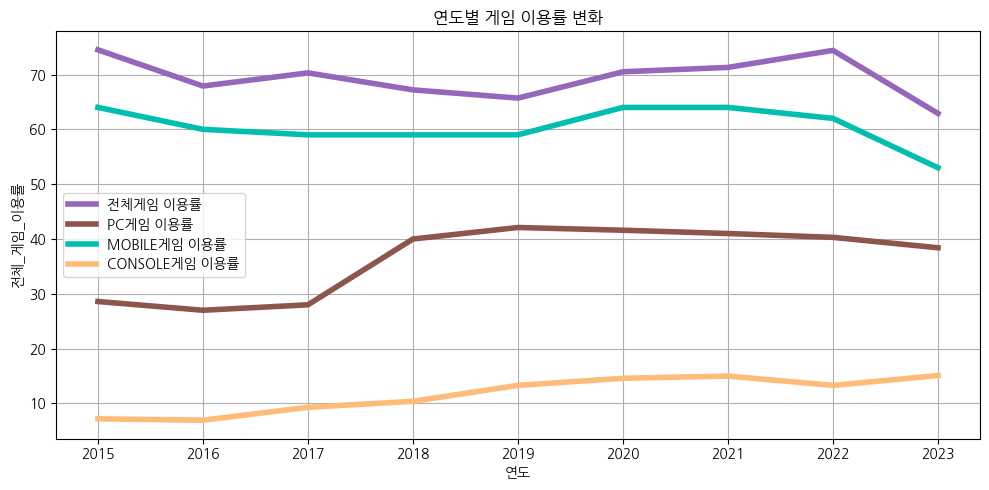

In [262]:
## 시각화
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='전체_게임_이용률', data=result_df, markers='o', label='전체게임 이용률', color='#9467bd', linewidth=4)
sns.lineplot(x='year', y='PC_게임_이용률', data=result_df, markers='o', label='PC게임 이용률', color='#8c564b', linewidth=4)
sns.lineplot(x='year', y='MOBILE_게임_이용률', data=result_df, markers='o', label='MOBILE게임 이용률', color='#00bfae', linewidth=4)
sns.lineplot(x='year', y='CONSOLE_게임_이용률', data=result_df, markers='o', label='CONSOLE게임 이용률', color='#ffbb78', linewidth=4)
plt.xlabel('연도')
plt.title('연도별 게임 이용률 변화')
plt.legend()
plt.tight_layout()  # 그래프의 여백을 자동으로 조정
plt.grid()
plt.show()

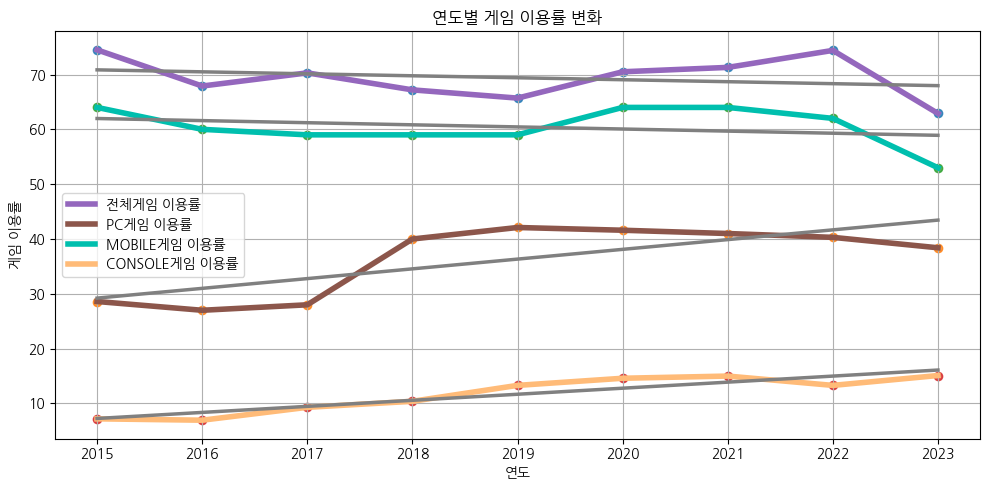

In [263]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='전체_게임_이용률', data=result_df, markers='o', label='전체게임 이용률', color='#9467bd', linewidth=4)
sns.lineplot(x='year', y='PC_게임_이용률', data=result_df, markers='o', label='PC게임 이용률', color='#8c564b', linewidth=4)
sns.lineplot(x='year', y='MOBILE_게임_이용률', data=result_df, markers='o', label='MOBILE게임 이용률', color='#00bfae', linewidth=4)
sns.lineplot(x='year', y='CONSOLE_게임_이용률', data=result_df, markers='o', label='CONSOLE게임 이용률', color='#ffbb78', linewidth=4)

# 전체 게임 이용률 추세선 추가 (선형 회귀)
sns.regplot(x='year', y='전체_게임_이용률', data=result_df, line_kws={'color': 'gray', 'linewidth': 2.5}, ci=None)
sns.regplot(x='year', y='PC_게임_이용률', data=result_df, line_kws={'color': 'gray', 'linewidth': 2.5}, ci=None)
sns.regplot(x='year', y='MOBILE_게임_이용률', data=result_df, line_kws={'color': 'gray', 'linewidth': 2.5}, ci=None)
sns.regplot(x='year', y='CONSOLE_게임_이용률', data=result_df, line_kws={'color': 'gray', 'linewidth': 2.5}, ci=None)

plt.xlabel('연도')
plt.ylabel('게임 이용률')
plt.title('연도별 게임 이용률 변화')
plt.legend()
plt.tight_layout()  # 그래프의 여백을 자동으로 조정
plt.grid()
plt.show()

🚀 연도별 게임 이용률 변화 시각화<hr>

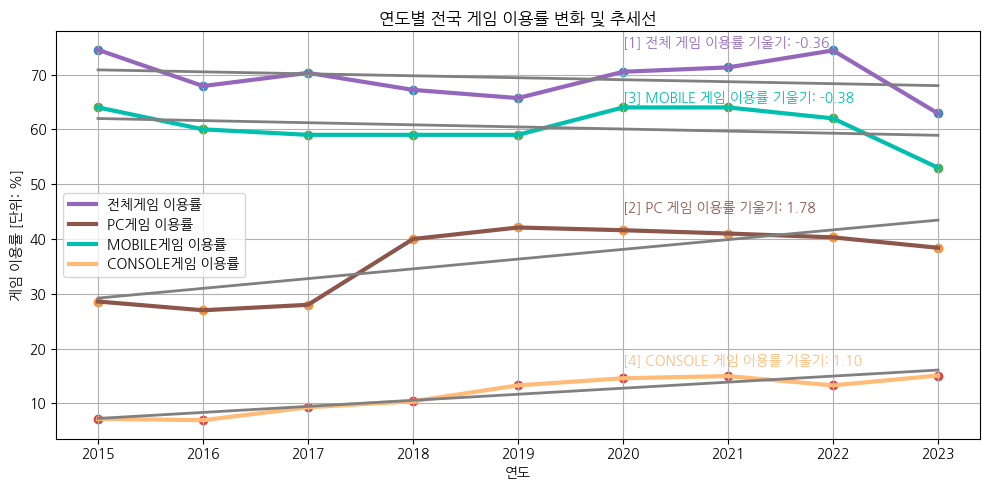

[1] 전체게임 이용률 추세선 기울기: -0.36
[2] PC게임 이용률 추세선 기울기: 1.78
[3] MOBILE게임 이용률 추세선 기울기: -0.38
[4] CONSOLE게임 이용률 추세선 기울기: 1.10


In [264]:
# 데이터 준비 (result_df가 이미 준비된 상태)
plt.figure(figsize=(10,5))

# 전체 게임 이용률 추세선 추가 (선형 회귀)
sns.lineplot(x='year', y='전체_게임_이용률', data=result_df, markers='o', label='전체게임 이용률', color='#9467bd', linewidth=3)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(result_df['year'], result_df['전체_게임_이용률'])
plt.text(2020, 75, f'[1] 전체 게임 이용률 기울기: {slope1:.2f}', color='#9467bd')  # 전체게임 기울기 표시

# PC 게임 이용률 추세선 추가 (선형 회귀)
sns.lineplot(x='year', y='PC_게임_이용률', data=result_df, markers='o', label='PC게임 이용률', color='#8c564b', linewidth=3)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(result_df['year'], result_df['PC_게임_이용률'])
plt.text(2020, 45, f'[2] PC 게임 이용률 기울기: {slope2:.2f}', color='#8c564b')  # PC게임 기울기 표시

# MOBILE 게임 이용률 추세선 추가 (선형 회귀)
sns.lineplot(x='year', y='MOBILE_게임_이용률', data=result_df, markers='o', label='MOBILE게임 이용률', color='#00bfae', linewidth=3)
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(result_df['year'], result_df['MOBILE_게임_이용률'])
plt.text(2020, 65, f'[3] MOBILE 게임 이용률 기울기: {slope3:.2f}', color='#00bfae')  # MOBILE게임 기울기 표시

# CONSOLE 게임 이용률 추세선 추가 (선형 회귀)
sns.lineplot(x='year', y='CONSOLE_게임_이용률', data=result_df, markers='o', label='CONSOLE게임 이용률', color='#ffbb78', linewidth=3)
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(result_df['year'], result_df['CONSOLE_게임_이용률'])
plt.text(2020, 17, f'[4] CONSOLE 게임 이용률 기울기: {slope4:.2f}',  color='#ffbb78')  # CONSOLE게임 기울기 표시

# 전체 게임 이용률 추세선 추가 (선형 회귀)
sns.regplot(x='year', y='전체_게임_이용률', data=result_df, line_kws={'color': 'gray', 'linewidth': 2}, ci=None)
sns.regplot(x='year', y='PC_게임_이용률', data=result_df, line_kws={'color': 'gray', 'linewidth': 2}, ci=None)
sns.regplot(x='year', y='MOBILE_게임_이용률', data=result_df, line_kws={'color': 'gray', 'linewidth': 2}, ci=None)
sns.regplot(x='year', y='CONSOLE_게임_이용률', data=result_df, line_kws={'color': 'gray', 'linewidth': 2}, ci=None)

# 그래프 꾸미기
plt.xlabel('연도')
plt.ylabel('게임 이용률 [단위: %]')
plt.title('연도별 전국 게임 이용률 변화 및 추세선')
plt.legend()
plt.tight_layout()  # 그래프의 여백을 자동으로 조정
plt.grid()
plt.show()

# 기울기 출력 
print(f"[1] 전체게임 이용률 추세선 기울기: {slope1:.2f}")
print(f"[2] PC게임 이용률 추세선 기울기: {slope2:.2f}")
print(f"[3] MOBILE게임 이용률 추세선 기울기: {slope3:.2f}")
print(f"[4] CONSOLE게임 이용률 추세선 기울기: {slope4:.2f}")

[결과]
- [1] 전체게임 이용률 하락
- [2] PC게임 이용률 상승
- [3] MOBILE게임 이용률 하락
- [4] CONSOLE게임 이용률 상승
<hr><hr>

[2] 실업률, 고용률, 경제활동참가율, 비경제활동인구, 전체_이용률, PC_이용률, MOBILE_이용률, CONSOLE_이용률 상관관계 <hr>

In [265]:
## DB 연결
conn = pymysql.connect(host='172.20.95.116', user='emily0', password='1234',
                       db='leisure', charset='utf8')

In [266]:
## SQL 실행
import pymysql.cursors

cur = conn.cursor(pymysql.cursors.DictCursor)
query = """
SELECT 
	t.year,
	e.national_unemployment_rate AS 실업률,
	e.national_employment_rate AS 고용률,
	e.active_population AS 경제활동참가율,
	e.inactive_population AS 비경제활동인구,
	t.전국 AS 전체_게임_이용률,
	p.전국 AS PC_게임_이용률,
	m.전국 AS MOBILE_게임_이용률,
	c.전국 AS CONSOLE_게임_이용률
FROM total_game_usage_rate AS t
INNER JOIN pc_game_usage_rate AS p ON t.year = p.year
INNER JOIN mobile_game_usage_rate AS m ON t.year = m.year
INNER JOIN feature_specific_console_game_usage_rate AS c ON t.year = c.year
INNER JOIN economic_summary AS e ON t.year = e.year
"""
cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
result_df2 = pd.DataFrame(rows) # DataFrame 형태로 변환
print(result_df2)
cur.close()
conn.close()

   year  실업률   고용률  경제활동참가율  비경제활동인구  전체_게임_이용률  PC_게임_이용률  MOBILE_게임_이용률  \
0  2015  3.6  60.5     63.0  16086.0       74.5       28.6             64   
1  2016  3.7  60.6     63.0  16187.0       67.9       27.0             60   
2  2017  3.7  60.8     63.0  16183.0       70.3       28.0             59   
3  2018  3.8  60.7     63.0  16287.0       67.2       40.0             59   
4  2019  3.8  60.9     63.0  16318.0       65.7       42.1             59   
5  2020  4.0  60.1     62.0  16773.0       70.5       41.6             64   
6  2021  3.7  60.5     63.0  16770.0       71.3       41.0             64   
7  2022  2.9  62.1     64.0  16339.0       74.4       40.3             62   
8  2023  2.7  62.6     64.0  16204.0       62.9       38.4             53   

   CONSOLE_게임_이용률  
0            7.20  
1            6.95  
2            9.30  
3           10.40  
4           13.30  
5           14.60  
6           15.00  
7           13.30  
8           15.10  


🚀 실업률, 고용률, 경제활동참가율, 비경제활동인구, 전체_이용률, PC_이용률, MOBILE_이용률, CONSOLE_이용률 시각화<hr>

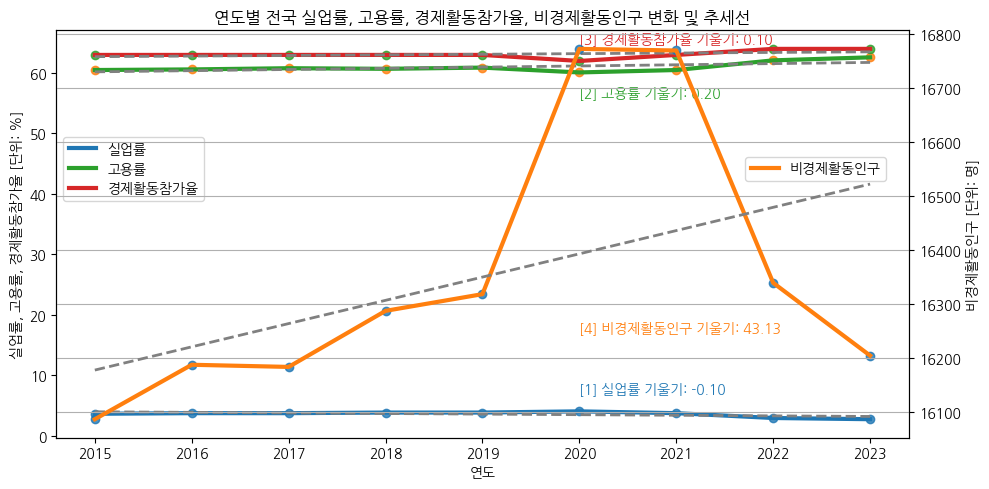

[1] 실업률 추세선 기울기: -0.10
[2] 고용률 추세선 기울기: 0.20
[3] 경제활동참가율 추세선 기울기: 0.10
[4] 비경제활동인구 추세선 기울기: 43.13


In [267]:
## 시각화  

# 새로운 그림을 생성
fig, ax1 = plt.subplots(figsize=(10, 5))

# 첫 번째 y축에 실업률, 고용률, 경제활동참가율 시각화
sns.lineplot(x='year', y='실업률', data=result_df2, markers='o', label='실업률', ax=ax1, color='#1f77b4', linewidth=3)
sns.lineplot(x='year', y='고용률', data=result_df2, markers='o', label='고용률', ax=ax1, color='#2ca02c', linewidth=3)
sns.lineplot(x='year', y='경제활동참가율', data=result_df2, markers='o', label='경제활동참가율', ax=ax1, color='#d62728', linewidth=3)

# 기울기 표시
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(result_df2['year'], result_df2['실업률'])
plt.text(2020, 7, f'[1] 실업률 기울기: {slope1:.2f}', color='#1f77b4')  
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(result_df2['year'], result_df2['고용률'])
plt.text(2020, 56, f'[2] 고용률 기울기: {slope2:.2f}', color='#2ca02c')  
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(result_df2['year'], result_df2['경제활동참가율'])
plt.text(2020, 65, f'[3] 경제활동참가율 기울기: {slope3:.2f}', color='#d62728')  

# 첫 번째 y축에 실업률, 고용률, 경제활동참가율 추세선 추가 (선형 회귀)
sns.regplot(x='year', y='실업률', data=result_df2, line_kws={'color': 'gray', 'linewidth': 2, 'linestyle':'dashed'}, ax=ax1, ci=None)
sns.regplot(x='year', y='고용률', data=result_df2, line_kws={'color': 'gray', 'linewidth': 2, 'linestyle':'dashed'}, ax=ax1, ci=None)
sns.regplot(x='year', y='경제활동참가율', data=result_df2, line_kws={'color': 'gray', 'linewidth': 2, 'linestyle':'dashed'}, ax=ax1, ci=None)

# 첫 번째 y축 레이블 설정
ax1.set_xlabel('연도')
ax1.set_ylabel('실업률, 고용률, 경제활동참가율 [단위: %]')

# 두 번째 y축을 생성 (비경제활동인구)
ax2 = ax1.twinx()

# 두 번째 y축에 비경제활동인구 시각화
sns.lineplot(x='year', y='비경제활동인구', data=result_df2, markers='o', label='비경제활동인구', ax=ax2, color='#ff7f0e', linewidth=3)

# 기울기 추가
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(result_df2['year'], result_df2['비경제활동인구'])
ax2.text(2020, result_df2['비경제활동인구'].min()*1.01, f'[4] 비경제활동인구 기울기: {slope4:.2f}', color='#ff7f0e')
# plt.text(2020, 0, f'[4] 비경제활동인구 기울기: {slope4:.2f}', color='#ff7f0e') 

# 두 번째 y축에 비경제활동인구 추세선 추가 (선형 회귀)
sns.regplot(x='year', y='비경제활동인구', data=result_df2, line_kws={'color': 'gray', 'linewidth': 2, 'linestyle':'dashed'}, ax=ax2, ci=None)

# 두 번째 y축 레이블 설정
ax2.set_ylabel('비경제활동인구 [단위: 명]')

# 레전드 설정
ax1.legend(loc='center left', bbox_to_anchor=(0, 0.659667))  # 왼쪽 중앙
ax2.legend(loc='center left', bbox_to_anchor=(0.8, 0.66))  # 왼쪽 중앙
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# 제목 설정
plt.title('연도별 전국 실업률, 고용률, 경제활동참가율, 비경제활동인구 변화 및 추세선')

# 그리드 설정
plt.grid()

# 그래프의 여백을 자동으로 조정
plt.tight_layout()  

# 그래프 출력
plt.show()


# 기울기 출력
print(f"[1] 실업률 추세선 기울기: {slope1:.2f}")
print(f"[2] 고용률 추세선 기울기: {slope2:.2f}")
print(f"[3] 경제활동참가율 추세선 기울기: {slope3:.2f}")
print(f"[4] 비경제활동인구 추세선 기울기: {slope4:.2f}")


결과(전체 추세)
- [1] 실업률 하락
- [2] 고용률 상승
- [3] 경제활동참가율 상승
- [4] 비경제활동인구 상승
<hr><hr>

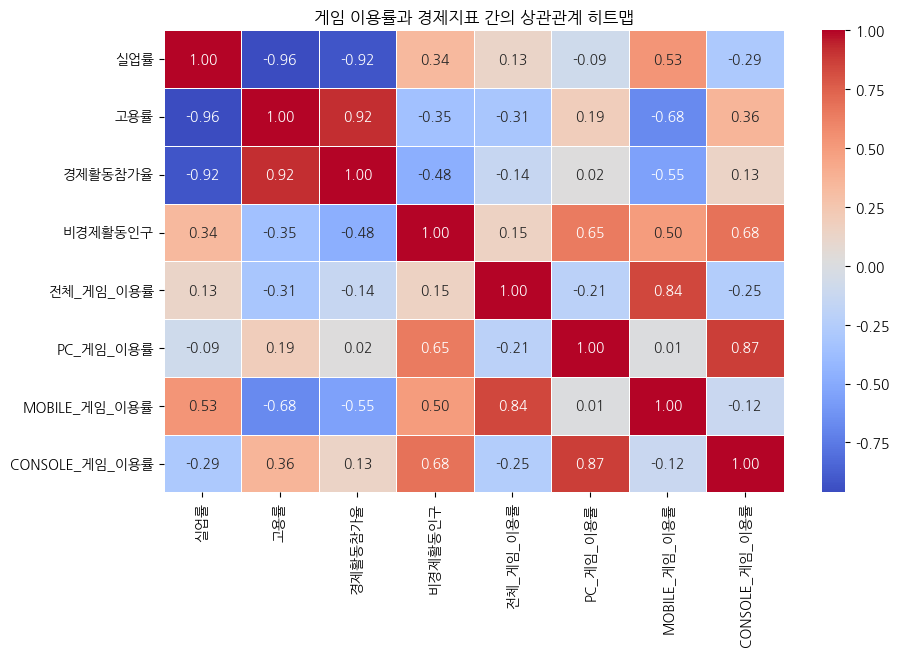

In [268]:

# 데이터 전처리: 숫자형 데이터만 선택
numeric_df = result_df2.set_index("year")  # 연도를 인덱스로 설정
numeric_df = numeric_df.astype(float)  # 혹시 숫자가 문자열이면 변환

# 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 제목 설정
plt.title("게임 이용률과 경제지표 간의 상관관계 히트맵")

# 그래프 출력
plt.show()

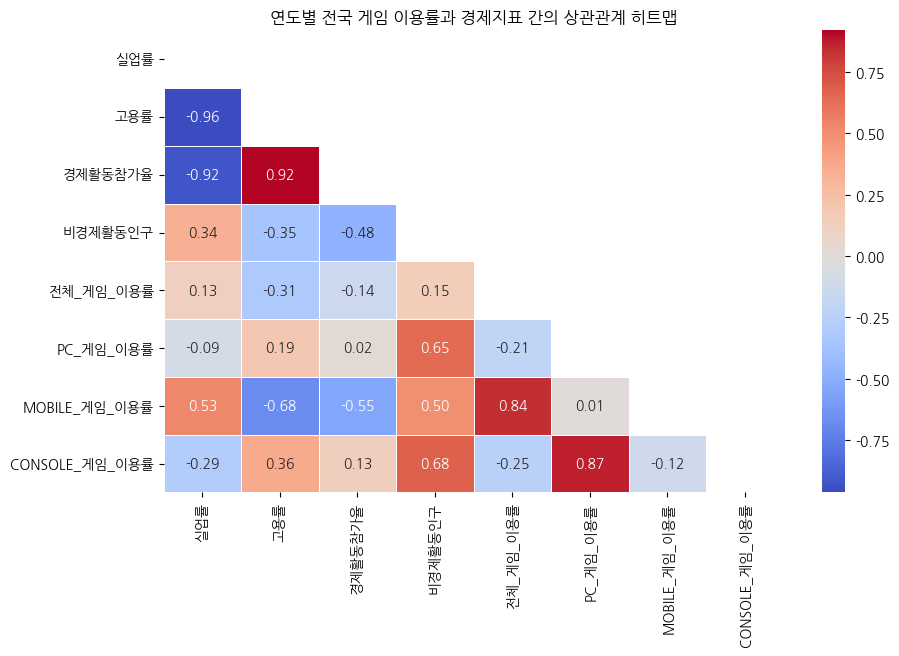

In [269]:
import numpy as np

plt.figure(figsize=(10, 6))
corr_matrix = numeric_df.corr()

# 삼각 행렬 형태로 마스킹 (하삼각 부분만 표시)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("연도별 전국 게임 이용률과 경제지표 간의 상관관계 히트맵")
plt.show()

In [270]:
# 전체 게임 이용률과 실업률 관계